In [28]:
!pip install scikit-learn


You should consider upgrading via the 'C:\Users\smain\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
from sklearn import preprocessing

# Sample input labels
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

# Create label encoder and fit the labels
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)

# Print the mapping 
print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)

# Encode a set of labels using the encoder
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", list(encoded_values))

# Decode a set of values using the encoder
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nEncoded values =", encoded_values)
print("Decoded labels =", list(decoded_list))




Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4

Labels = ['green', 'red', 'black']
Encoded values = [1, 2, 0]

Encoded values = [3, 0, 4, 1]
Decoded labels = ['white', 'black', 'yellow', 'green']


Ce code illustre l'utilisation de Label Encoding pour convertir des étiquettes textuelles en valeurs numériques à l’aide de scikit-learn.

Il commence par encoder une liste de couleurs en associant un entier unique à chaque couleur. Ensuite, il encode une liste de test en valeurs numériques et inverse l’encodage pour retrouver les étiquettes d'origine.

Ce procédé est utile pour transformer des catégories textuelles en valeurs exploitables par des algorithmes de Machine Learning.

---

C:\Users\smain\AppData\Local\Temp\ipykernel_31524\386496739.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == cl, 0], X[y == cl, 1],


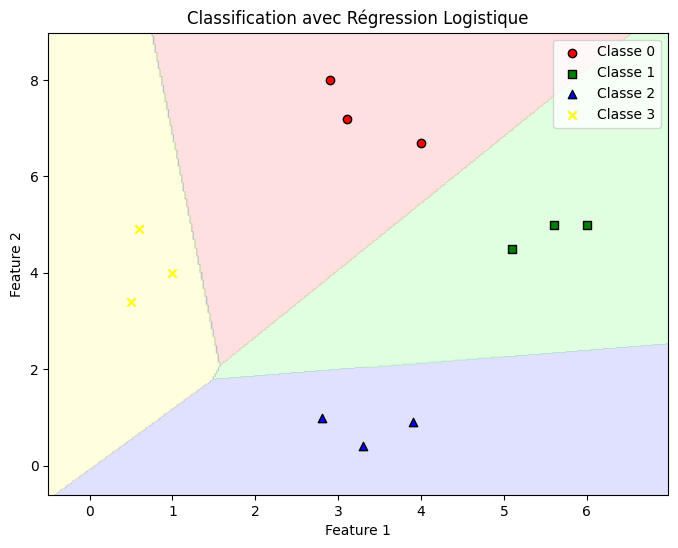

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# 📌 Définition des données d'entrée
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], 
              [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], 
              [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# 📌 Création du modèle de régression logistique
classifier = LogisticRegression(solver='liblinear', C=1)
classifier.fit(X, y)

# 📌 Fonction pour tracer la frontière de décision
def plot_decision_boundary(classifier, X, y):
    h = 0.02  # Taille du pas pour la grille

    # Définir les limites du graphique
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Prédire les classes pour chaque point de la grille
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 📌 Affichage des frontières de décision
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FF9999', '#99FF99', '#9999FF', '#FFFF99']))
    
    # 📌 Affichage des points de données
    markers = ['o', 's', '^', 'x']
    colors = ['red', 'green', 'blue', 'yellow']

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], X[y == cl, 1], 
                    c=colors[idx], marker=markers[idx], label=f'Classe {cl}', edgecolors='black')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title("Classification avec Régression Logistique")
    plt.show()

# 📌 Exécuter la visualisation
plot_decision_boundary(classifier, X, y)


Ce code applique une régression logistique pour classifier des données en quatre classes. Il entraîne un modèle avec sklearn, puis génère une frontière de décision en utilisant un maillage de points. Enfin, il affiche les régions de classification et les données sur un graphique.

---

In [29]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("✅ `y` a été encodé :", np.unique(y))


# 📌 Vérifier les nouvelles valeurs de `y`
print("✅ `y` a été converti en classes :", np.unique(y))

# 📌 Ajouter le dossier `Downloads` à `sys.path` pour `utilities.py`
utilities_path = r"C:\Users\smain\Downloads"

if utilities_path not in sys.path:
    sys.path.append(utilities_path)

# 📌 Importer `visualize_classifier`
try:
    from utilities import visualize_classifier
    print("✅ Module `utilities.py` importé avec succès !")
except ModuleNotFoundError:
    raise ModuleNotFoundError(f"❌ ERREUR : `utilities.py` est introuvable dans {utilities_path}")

# 📌 Chemin du fichier de données
input_file = r"C:\Users\smain\Downloads\data_multivar_regr.txt"

# 📌 Vérifier si le fichier existe avant de le charger
if not os.path.exists(input_file):
    raise FileNotFoundError(f"❌ ERREUR : Le fichier {input_file} est introuvable !")

# 📌 Charger les données
data = np.loadtxt(input_file, delimiter=',')

# 📌 Vérifier la structure des données
print("\n📊 Aperçu des données (5 premières lignes) :\n", data[:5])
print("🔍 Dimensions des données :", data.shape)

# 📌 Séparer X (features) et y (labels)
X, y = data[:, :-1], data[:, -1]

# 📌 Vérifier les dimensions et types avant correction
print("\n📌 Vérification avant correction")
print("X shape:", X.shape, "| X type:", X.dtype)
print("y shape:", y.shape, "| y type:", y.dtype)

# 📌 S'assurer que `y` est un vecteur `1D`
y = y.ravel()

# 📌 Convertir `X` en `float`
X = X.astype(float)

# 📌 Vérifier que `X` et `y` ont la même taille
if X.shape[0] != y.shape[0]:
    min_length = min(X.shape[0], y.shape[0])
    X = X[:min_length]
    y = y[:min_length]
    print(f"⚠️ Correction appliquée : X et y ont maintenant {min_length} échantillons.")

# 📌 Vérification après correction
print("\n📌 Vérification après correction")
print("X shape:", X.shape, "| X type:", X.dtype)
print("y shape:", y.shape, "| y type:", y.dtype)

# 📌 Créer et entraîner le classificateur Naive Bayes
classifier = GaussianNB()
classifier.fit(X, y)

# 📌 Prédictions sur l’ensemble d’entraînement
y_pred = classifier.predict(X)

# 📌 Calcul de la précision
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("\n🎯 Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")

# 📌 Visualisation des résultats
visualize_classifier(classifier, X, y)

###############################################
# 📌 Cross-validation

# 📌 Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# 📌 Création du nouveau classificateur et entraînement
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)

# 📌 Prédictions sur l’ensemble de test
y_test_pred = classifier_new.predict(X_test)

# 📌 Calcul de la précision sur les données de test
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("🎯 Accuracy of the new classifier =", round(accuracy, 2), "%")

# 📌 Visualisation du classificateur sur les données de test
visualize_classifier(classifier_new, X_test, y_test)

###############################################
# 📌 Évaluation du modèle avec Cross-validation

num_folds = 3

# 📌 Calcul des métriques
metrics = {
    "Accuracy": "accuracy",
    "Precision": "precision_weighted",
    "Recall": "recall_weighted",
    "F1-score": "f1_weighted"
}

for metric_name, metric in metrics.items():
    values = cross_val_score(classifier, X, y, scoring=metric, cv=num_folds)
    print(f"{metric_name}: {round(100 * values.mean(), 2)}%")


✅ `y` a été encodé : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
✅ `y` a été converti en classes : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
✅ Module `utilities.py` importé avec succès !

📊 Aperçu des données (5 premières lignes) :
 [[ 2.06  3.48  7.21 15.69]
 [ 6.37  3.01  7.27 15.34]
 [ 1.18  1.2   5.42  0.66]
 [ 7.37  3.81 -1.95 38.37]
 [ 6.16  1.39  7.39  9.96]]
🔍 Dimensions des données : (700, 4)

📌 Vérification avant correction
X shape: (700, 3) | X type: float64
y shape: (700,) | y type: float64

📌 Vérification après correction
X shape: (700, 3) | X type: float64
y shape: (700,) | y type: float64


ValueError: Unknown label type: (array([-12.3 ,  -8.77,  -8.26,  -8.  ,  -7.8 ,  -7.36,  -7.26,  -7.07,
        -6.79,  -6.64,  -6.11,  -6.  ,  -5.29,  -4.19,  -3.88,  -3.79,
        -2.9 ,  -2.08,  -1.84,  -1.81,  -1.76,  -1.5 ,  -1.44,  -1.39,
        -1.3 ,  -1.21,  -1.2 ,  -0.99,  -0.85,  -0.38,   0.06,   0.19,
         0.51,   0.66,   1.4 ,   1.55,   1.82,   2.02,   2.06,   2.59,
         2.82,   3.07,   3.09,   3.14,   3.32,   3.59,   3.61,   3.78,
         3.9 ,   3.98,   4.2 ,   4.38,   4.62,   4.67,   5.22,   5.24,
         5.33,   5.41,   5.59,   5.67,   5.72,   5.79,   5.85,   5.89,
         6.19,   6.23,   6.33,   6.44,   6.5 ,   6.52,   6.54,   6.69,
         6.77,   6.83,   6.86,   7.12,   7.18,   7.42,   7.47,   7.49,
         7.65,   7.69,   7.73,   7.9 ,   7.94,   8.01,   8.06,   8.11,
         8.22,   8.23,   8.26,   8.27,   8.35,   8.37,   8.41,   8.45,
         8.55,   8.59,   8.67,   8.72,   8.75,   8.83,   8.87,   9.05,
         9.06,   9.07,   9.21,   9.23,   9.36,   9.48,   9.73,   9.96,
        10.02,  10.37,  10.53,  10.58,  10.66,  10.68,  10.84,  10.94,
        10.97,  11.15,  11.17,  11.3 ,  11.37,  11.66,  11.78,  11.8 ,
        11.99,  12.  ,  12.01,  12.31,  12.39,  12.42,  12.53,  12.57,
        12.59,  12.63,  12.64,  12.67,  12.69,  12.77,  12.81,  12.82,
        12.87,  13.  ,  13.03,  13.04,  13.41,  13.43,  13.48,  13.55,
        13.6 ,  13.66,  13.67,  13.71,  13.83,  13.86,  13.96,  13.97,
        14.01,  14.12,  14.14,  14.15,  14.2 ,  14.21,  14.3 ,  14.34,
        14.36,  14.41,  14.44,  14.47,  14.58,  14.73,  14.97,  15.22,
        15.25,  15.31,  15.33,  15.34,  15.41,  15.43,  15.49,  15.51,
        15.63,  15.69,  15.71,  15.84,  15.88,  15.95,  16.  ,  16.1 ,
        16.17,  16.18,  16.21,  16.23,  16.32,  16.35,  16.42,  16.43,
        16.55,  16.65,  16.69,  16.73,  16.86,  16.87,  16.91,  16.94,
        16.96,  17.08,  17.11,  17.14,  17.17,  17.21,  17.23,  17.26,
        17.27,  17.28,  17.35,  17.4 ,  17.42,  17.45,  17.47,  17.5 ,
        17.51,  17.56,  17.64,  17.74,  17.76,  17.82,  17.89,  18.06,
        18.09,  18.1 ,  18.11,  18.13,  18.17,  18.43,  18.44,  18.46,
        18.5 ,  18.62,  18.65,  18.7 ,  18.75,  18.78,  18.8 ,  18.84,
        18.87,  18.9 ,  18.91,  18.98,  18.99,  19.03,  19.13,  19.21,
        19.22,  19.28,  19.39,  19.44,  19.51,  19.77,  19.78,  19.81,
        19.91,  19.93,  19.96,  20.  ,  20.05,  20.06,  20.15,  20.16,
        20.18,  20.32,  20.36,  20.38,  20.41,  20.44,  20.47,  20.5 ,
        20.54,  20.55,  20.57,  20.58,  20.59,  20.62,  20.65,  20.68,
        20.7 ,  20.82,  20.84,  20.86,  20.97,  20.98,  21.12,  21.27,
        21.32,  21.33,  21.35,  21.36,  21.42,  21.47,  21.56,  21.58,
        21.64,  21.81,  21.88,  22.02,  22.08,  22.09,  22.21,  22.35,
        22.48,  22.49,  22.52,  22.54,  22.69,  22.75,  22.8 ,  22.85,
        22.88,  22.89,  22.94,  22.96,  23.  ,  23.05,  23.12,  23.14,
        23.15,  23.16,  23.21,  23.26,  23.33,  23.4 ,  23.42,  23.51,
        23.61,  23.7 ,  23.74,  23.84,  23.96,  24.04,  24.07,  24.09,
        24.1 ,  24.14,  24.15,  24.2 ,  24.38,  24.47,  24.51,  24.53,
        24.54,  24.56,  24.66,  24.74,  24.79,  24.83,  24.89,  24.92,
        24.93,  25.08,  25.13,  25.14,  25.15,  25.19,  25.25,  25.27,
        25.29,  25.31,  25.33,  25.45,  25.53,  25.55,  25.58,  25.64,
        25.66,  25.7 ,  25.72,  25.74,  25.77,  25.8 ,  25.88,  25.95,
        25.97,  26.12,  26.3 ,  26.32,  26.33,  26.42,  26.46,  26.47,
        26.49,  26.53,  26.66,  26.92,  26.98,  26.99,  27.05,  27.13,
        27.14,  27.17,  27.27,  27.28,  27.29,  27.37,  27.42,  27.48,
        27.5 ,  27.51,  27.62,  27.69,  27.7 ,  27.74,  27.79,  27.89,
        27.98,  28.  ,  28.05,  28.3 ,  28.31,  28.35,  28.36,  28.38,
        28.39,  28.4 ,  28.42,  28.48,  28.57,  28.63,  28.68,  28.7 ,
        28.76,  28.79,  28.89,  28.93,  28.99,  29.02,  29.07,  29.15,
        29.23,  29.27,  29.31,  29.32,  29.34,  29.36,  29.43,  29.44,
        29.56,  29.59,  29.66,  29.7 ,  29.74,  29.77,  29.89,  29.95,
        30.08,  30.17,  30.23,  30.36,  30.4 ,  30.41,  30.43,  30.44,
        30.45,  30.53,  30.55,  30.61,  30.62,  30.69,  30.7 ,  30.71,
        30.72,  30.97,  31.01,  31.06,  31.23,  31.25,  31.27,  31.32,
        31.36,  31.41,  31.47,  31.48,  31.55,  31.59,  31.67,  31.71,
        31.74,  31.82,  31.85,  31.91,  31.96,  32.02,  32.11,  32.15,
        32.17,  32.2 ,  32.24,  32.25,  32.32,  32.53,  32.57,  32.78,
        32.85,  33.  ,  33.07,  33.1 ,  33.32,  33.37,  33.47,  33.59,
        33.7 ,  33.83,  33.85,  33.89,  33.91,  33.92,  34.05,  34.06,
        34.07,  34.13,  34.19,  34.25,  34.27,  34.34,  34.35,  34.44,
        34.47,  34.51,  34.6 ,  34.73,  34.79,  34.86,  34.97,  35.05,
        35.15,  35.16,  35.2 ,  35.22,  35.28,  35.29,  35.31,  35.34,
        35.39,  35.51,  35.55,  35.63,  35.65,  35.67,  35.69,  35.7 ,
        35.98,  36.05,  36.06,  36.07,  36.09,  36.27,  36.41,  36.44,
        36.59,  36.65,  36.78,  36.88,  37.03,  37.25,  37.48,  37.76,
        37.84,  37.85,  37.97,  38.14,  38.15,  38.22,  38.24,  38.34,
        38.37,  38.38,  38.45,  38.62,  38.65,  38.66,  38.67,  38.69,
        38.83,  39.08,  39.46,  39.55,  39.58,  39.66,  39.7 ,  39.76,
        40.18,  40.22,  40.24,  40.42,  40.43,  40.5 ,  40.53,  40.54,
        40.71,  40.72,  41.2 ,  41.31,  41.35,  41.51,  41.74,  41.75,
        42.04,  42.05,  42.11,  42.34,  42.36,  42.55,  42.71,  42.74,
        42.91,  42.94,  42.98,  43.29,  43.34,  43.79,  44.17,  44.21,
        44.49,  44.86,  44.93,  45.58,  46.13,  46.43,  46.51,  46.62,
        46.64,  47.21,  47.26,  47.31,  47.47,  47.98,  48.29,  48.31,
        48.32,  49.47,  49.52,  49.68,  50.56,  56.05,  56.1 ]),)

Ce code applique Naive Bayes pour la classification de données. Il charge un fichier contenant des données, prétraite les entrées et les étiquettes, puis entraîne un classificateur Naive Bayes. Il évalue la précision sur les données d'entraînement et de test en utilisant cross-validation et affiche les frontières de décision via une visualisation graphique.

---

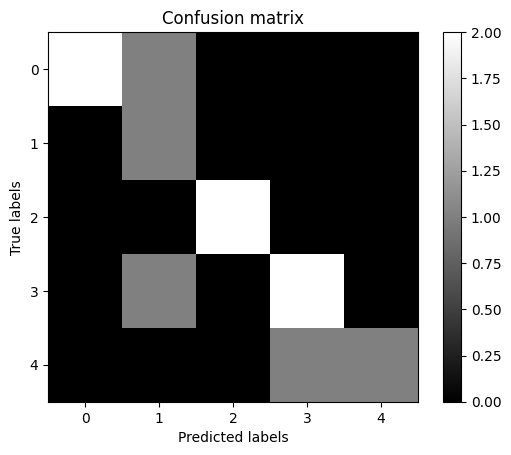


               precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.33      1.00      0.50         1
     Class-2       1.00      1.00      1.00         2
     Class-3       0.67      0.67      0.67         3
     Class-4       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Define sample labels
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

# Create confusion matrix
confusion_mat = confusion_matrix(true_labels, pred_labels)

# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

# Classification report
targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
print('\n', classification_report(true_labels, pred_labels, target_names=targets))



Ce code analyse les performances d’un modèle de classification en générant une matrice de confusion et un rapport de classification.

Il commence par définir deux listes d’étiquettes : les vraies valeurs et les prédictions faites par le modèle. Ensuite, il construit une matrice de confusion, qui montre le nombre d’exemples bien classés et mal classés.

La matrice est affichée sous forme d’image en niveaux de gris pour une meilleure visualisation. Enfin, un rapport de classification est généré, incluant la précision, le rappel et le score F1 pour chaque classe.

---

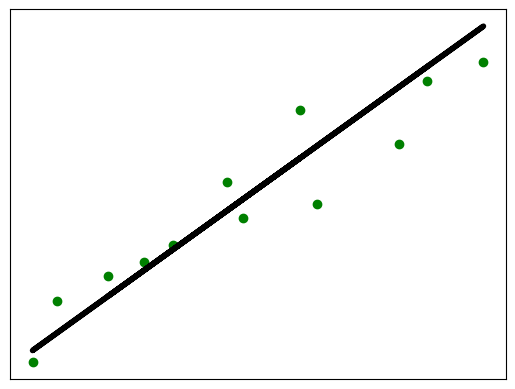

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86

New mean absolute error = 0.59


In [26]:
import pickle

import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Input file containing data
input_file = r'C:\Users\smain\Downloads\data_singlevar_regr.txt' 

# Read data
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Train and test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train, y_train = X[:num_training], y[:num_training]

# Test data
X_test, y_test = X[num_training:], y[num_training:]

# Create linear regressor object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Predict the output
y_test_pred = regressor.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

# Model persistence
output_model_file = 'model.pkl'

# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

# Load the model
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

# Perform prediction on test data
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))



Ce code met en place un modèle de régression linéaire pour prédire une variable cible à partir d’une seule variable explicative.

Il commence par charger les données depuis un fichier texte, puis divise ces données en un jeu d'entraînement (80%) et un jeu de test (20%). Ensuite, il crée et entraîne un modèle de régression linéaire sur les données d'entraînement.

Une fois le modèle entraîné, il fait des prédictions sur les données de test et affiche les résultats sous forme de graphique, où les points réels sont en vert et la prédiction en noir.

Enfin, il évalue les performances du modèle avec plusieurs métriques d’erreur et enregistre le modèle avec Pickle pour une utilisation future. Le modèle est ensuite rechargé et testé pour confirmer qu'il fonctionne toujours correctement.

---

🎯 Score R² du modèle : 0.6136


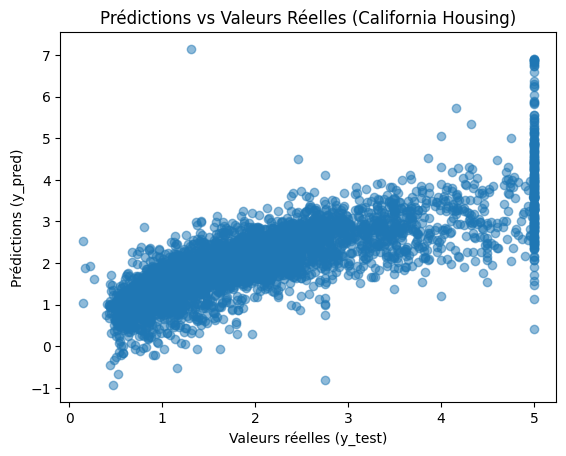

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 📌 Charger les données California Housing
data = fetch_california_housing()

# 📌 Séparer les features (X) et la target (y)
X, y = data.data, data.target

# 📌 Shuffle (mélanger) les données
X, y = shuffle(X, y, random_state=7)

# 📌 Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# 📌 Normalisation des features (important pour la régression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# 📌 Calcul du score R²
score = model.score(X_test, y_test)
print(f"🎯 Score R² du modèle : {score:.4f}")

# 📌 Visualisation des prédictions vs valeurs réelles
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Prédictions (y_pred)")
plt.title("Prédictions vs Valeurs Réelles (California Housing)")
plt.show()


Ce code implémente un modèle de régression linéaire pour prédire les prix des logements en Californie à partir d’un ensemble de données fourni par Scikit-Learn.

Il commence par charger et mélanger les données, puis sépare ces dernières en jeu d'entraînement (80%) et jeu de test (20%). Ensuite, il applique une normalisation des features pour améliorer la performance du modèle.

Un modèle de régression linéaire est ensuite entraîné sur les données d'entraînement et utilisé pour prédire les prix sur le jeu de test. La performance du modèle est évaluée à l'aide du score R², qui mesure la qualité des prédictions.

Enfin, une visualisation graphique est générée pour comparer les valeurs réelles des prix avec les prédictions du modèle.